In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING DATASET

In [217]:
from sklearn.datasets import load_boston
boston = load_boston()

In [218]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [219]:
df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### CRIM    : Per capita crime rate by town
#### ZN      : Proportion of residential land zoned for lots over 25,000 sq.ft.
#### INDUS   : Proportion of non-retail business acres per town
#### CHAS    : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#### NOX     : Nitric oxides concentration (parts per 10 million)
#### RM      : Average number of rooms per dwelling
#### AGE     : Proportion of owner-occupied units built prior to 1940
#### DIS     : Weighted distances to five Boston employment centres
#### RAD     : Index of accessibility to radial highways
#### TAX     : Full-value property-tax rate per 10,000usd
#### PTRATIO : Pupil-teacher ratio by town
#### B       : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#### LSTAT   : % lower status of the population

In [220]:
df['PRICES'] = boston.target

### UNDERSTANDING THE DATA

In [221]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [222]:
df.shape

(506, 14)

In [223]:
df.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICES'], dtype=object)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICES   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [225]:
# No null values are present
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICES     0
dtype: int64

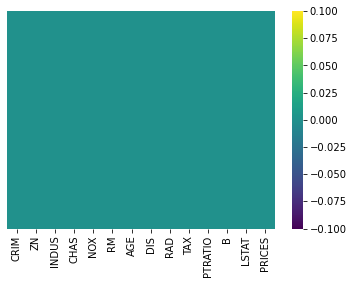

In [226]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = True, cmap = 'viridis')

In [227]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [228]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICES     229
dtype: int64

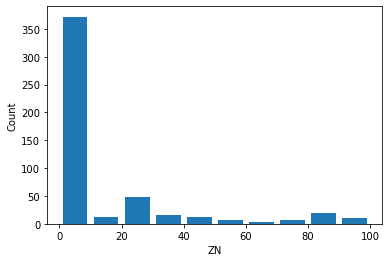

In [229]:
plt.hist(df.ZN,bins = 10, rwidth = 0.8)
plt.xlabel('ZN')
plt.ylabel("Count")
plt.show()

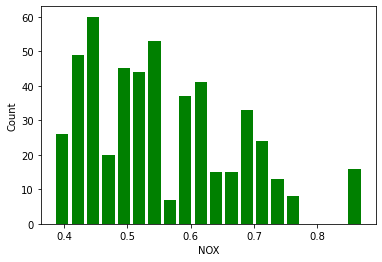

In [230]:
plt.hist(df.NOX, bins = 20, rwidth = 0.8, color = "green")
plt.xlabel("NOX")
plt.ylabel("Count")
plt.show()

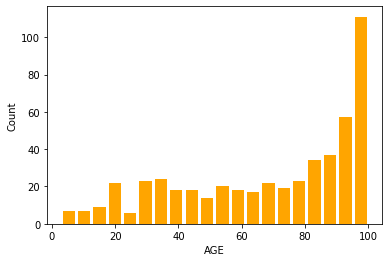

In [231]:
plt.hist(df.AGE, bins = 20, rwidth = 0.8, color = "orange")
plt.xlabel("AGE")
plt.ylabel("Count")
plt.show()

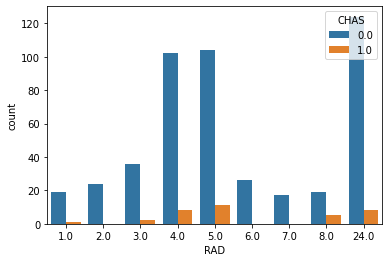

In [232]:
sns.countplot(x = "RAD", hue = "CHAS", data = df)

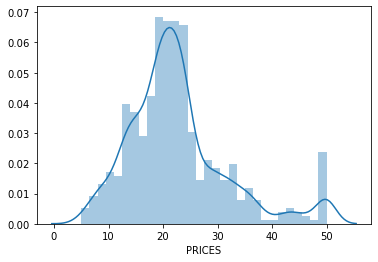

In [233]:
sns.distplot(df['PRICES'], bins=30)
plt.show()

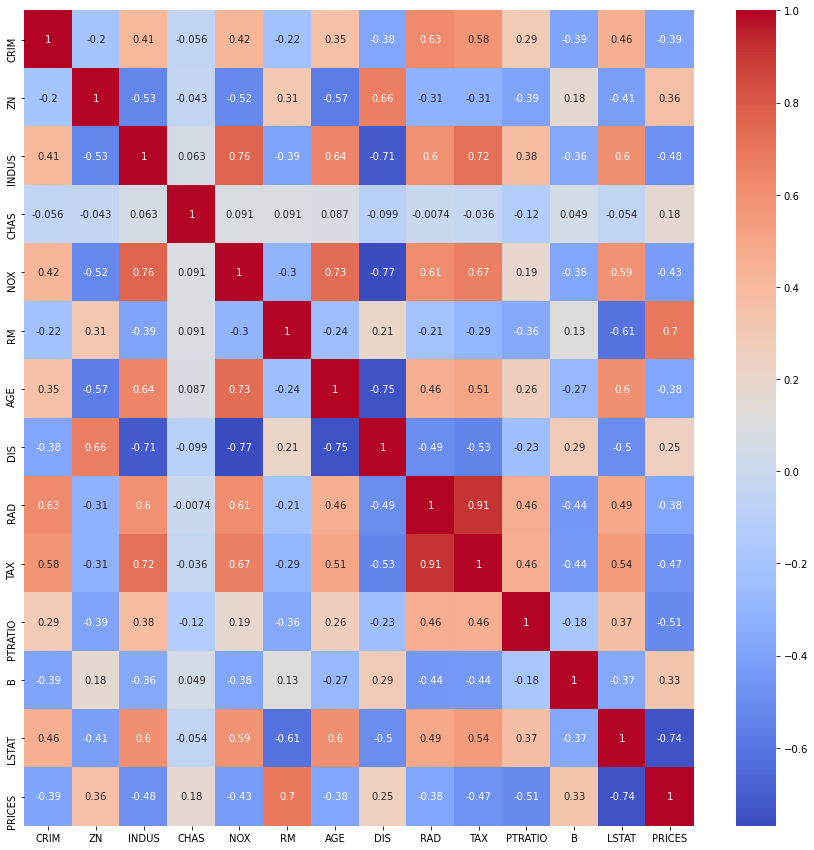

In [234]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

##### RM HAS THE MAXIMUM POSITIVE CORRELATION WITH PRICES

Text(0, 0.5, 'PRICES')

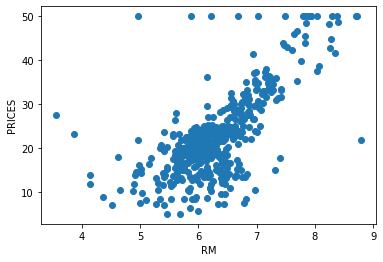

In [235]:
plt.scatter(x = df.RM, y = df.PRICES, marker='o')
plt.xlabel('RM')
plt.ylabel('PRICES')

##### LSTAT HAS THE LOWEST NEGATIVE CORRELATION WITH PRICES

Text(0, 0.5, 'PRICES')

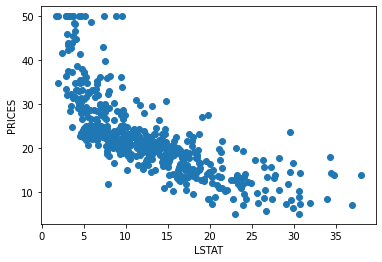

In [236]:
plt.scatter(x = df.LSTAT, y = df.PRICES, marker='o')
plt.xlabel('LSTAT')
plt.ylabel('PRICES')

## LINEAR REGRESSION

##### PRICES IS THE TARGET VARIABLE

In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [238]:
# RM was chosen because it has the highest positive correlation with PRICES
# LSTAT was chosen as it has the lowest negative coorelation with PRICES
X = df[['RM','LSTAT']]
y = df['PRICES']

#### TRAINING

In [239]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X, y, test_size = 0.2, random_state = 5 )

In [240]:
X_train.shape , X_test.shape

((404, 2), (102, 2))

In [241]:
y_train.shape , y_test.shape

((404,), (102,))

In [242]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

#### PREDICTING

In [243]:
predictions = lr.predict(X_test)

In [244]:
from sklearn import metrics
print("MAE : ",metrics.mean_absolute_error(y_test,predictions))
print("MSE : ",metrics.mean_squared_error(y_test,predictions))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R2 score :",metrics.r2_score(y_test,predictions))

MAE :  3.791310213343103
MSE :  26.392886822666085
RMSE : 5.137400784702911
R2 score : 0.6628996975186953


### TESTING

In [245]:
Y = df.iloc[35]['PRICES']
Y

18.9

In [246]:
Y_hat = predictions[35]
Y_hat

22.975476714321566

In [247]:
Error = Y_hat - Y
Error

4.075476714321567

In [248]:
lr.intercept_

2.736240342606571

In [249]:
lr.coef_

array([ 4.59, -0.72])

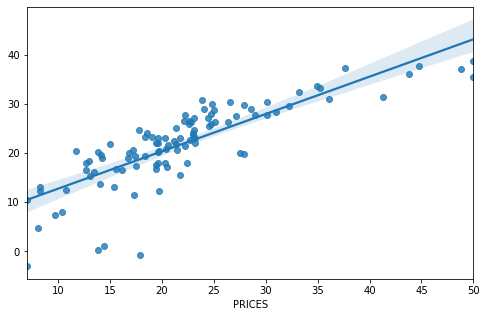

In [250]:
plt.figure(figsize = (8,5))
sns.regplot(y_test, predictions, label = "LSTAT")

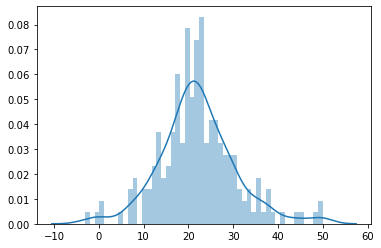

In [251]:
sns.distplot((y_test, predictions), bins = 50)

## LOGISTIC REGRESSION

##### CHAS IS THE TARGET VARIABLE

In [252]:
df.groupby('CHAS').count()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
CHAS,,,,,,,,,,,,,
0.0,471,471,471,471,471,471,471,471,471,471,471,471,471
1.0,35,35,35,35,35,35,35,35,35,35,35,35,35


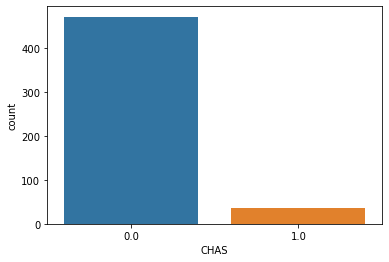

In [253]:
sns.countplot(x=df.CHAS, data = df)

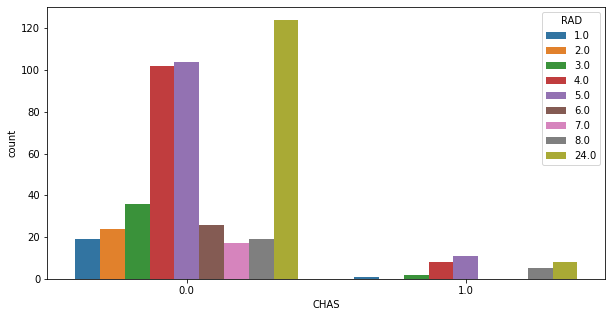

In [254]:
plt.figure(figsize = (10,5))
sns.countplot(x=df.CHAS, hue = "RAD" ,data = df)

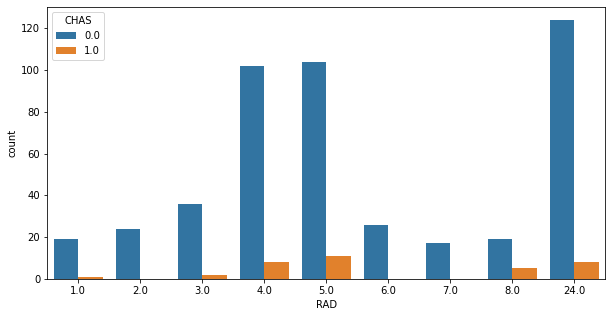

In [255]:
plt.figure(figsize = (10,5))
sns.countplot(x=df.RAD, hue = "CHAS" ,data = df)

In [256]:
df.dtypes.value_counts()

float64    14
dtype: int64

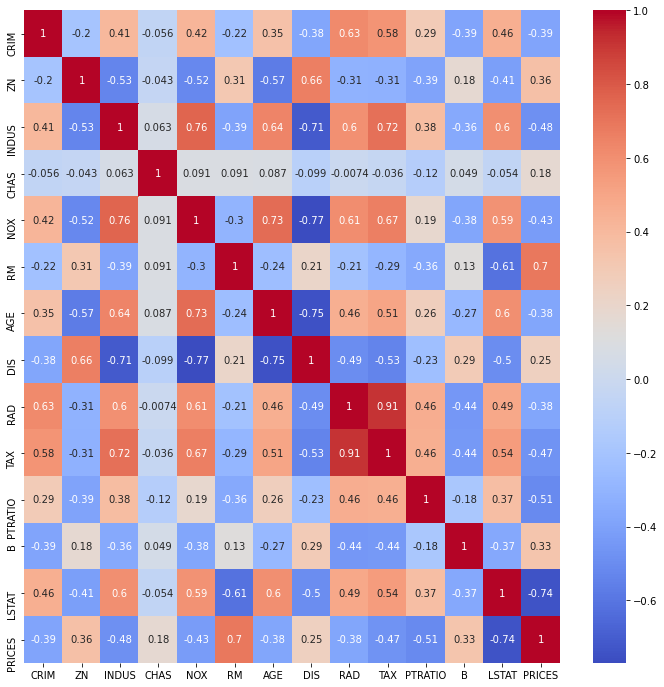

In [257]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [258]:
df2 = df.drop("CHAS", axis = 1)
df2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [259]:
df2.shape

(506, 13)

In [260]:
X = df2
y = df['CHAS']
y.shape

(506,)

#### TRAINING

In [261]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X, y, test_size = 0.2, random_state = 3 )

In [262]:
print("Train Size = ",len(X_train))
print("Test Size = ",len(X_test))

Train Size =  404
Test Size =  102


In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score

In [264]:
lr = LogisticRegression()
lr.fit ( X_train , y_train )

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### PREDICTING

In [265]:
predictions = lr.predict(X_test)
predictions.size

102

In [266]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94        94
         1.0       0.00      0.00      0.00         8

    accuracy                           0.89       102
   macro avg       0.46      0.48      0.47       102
weighted avg       0.85      0.89      0.87       102



#### ACCURACY

In [267]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[91,  3],
       [ 8,  0]], dtype=int64)

In [268]:
confusion_matrix(y_test,predictions).sum(axis = 0)

array([99,  3], dtype=int64)

In [269]:
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[91  3]
 [ 8  0]]


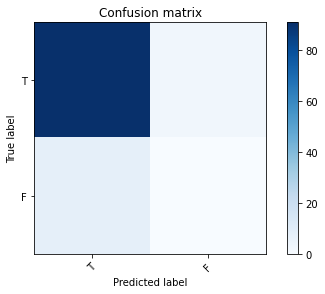

In [270]:
labels = ['T', 'F']

cm = confusion_matrix(y_test,predictions)
np.set_printoptions(precision = 2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)
plt.show()

In [271]:
accuracy_score(y_test,predictions)*100

89.2156862745098

### TESTING

In [272]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICES'],
      dtype='object')

In [273]:
def predictive_chas(CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,
       PTRATIO, B, LSTAT,PRICES) :
    if lr.predict([[CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,
       PTRATIO, B, LSTAT,PRICES]]) == np.array([1]) :
        print("Tract bounds river")
    else :
        print("Tract does not bound river")

In [274]:
y_test.iloc[35]

0.0

In [275]:
predictions[35]

0.0

In [276]:
predictive_chas(8.49213, 0.0	,18.1,	0.584,	6.348,	86.1,	2.0527,	24.0,	666.0,	20.2,	83.45,	17.64,	14.5)

Tract does not bound river
